In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score

In [5]:
from sklearn.metrics import confusion_matrix,r2_score,classification_report
from sklearn.metrics import precision_score,f1_score,accuracy_score

In [6]:
df = pd.read_csv('heart.csv')
df.shape

(1025, 14)

"   1 id: patient identification number
      2 ccf: social security number (I replaced this with a dummy value of 0)
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      5 painloc: chest pain location (1 = substernal; 0 = otherwise)
      6 painexer (1 = provoked by exertion; 0 = otherwise)
      7 relrest (1 = relieved after rest; 0 = otherwise)
      8 pncaden (sum of 5, 6, and 7)
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     11 htn
     12 chol: serum cholestoral in mg/dl
     13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     14 cigs (cigarettes per day)
     15 years (number of years as a smoker)
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

In [7]:
df.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [8]:
x,y = df.drop('target',axis =1),df['target']
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


<Axes: xlabel='target'>

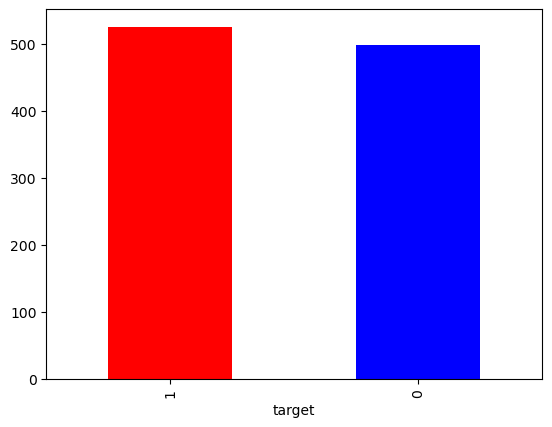

In [11]:
df['target'].value_counts().plot(kind='bar',color=['red','blue'])

In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

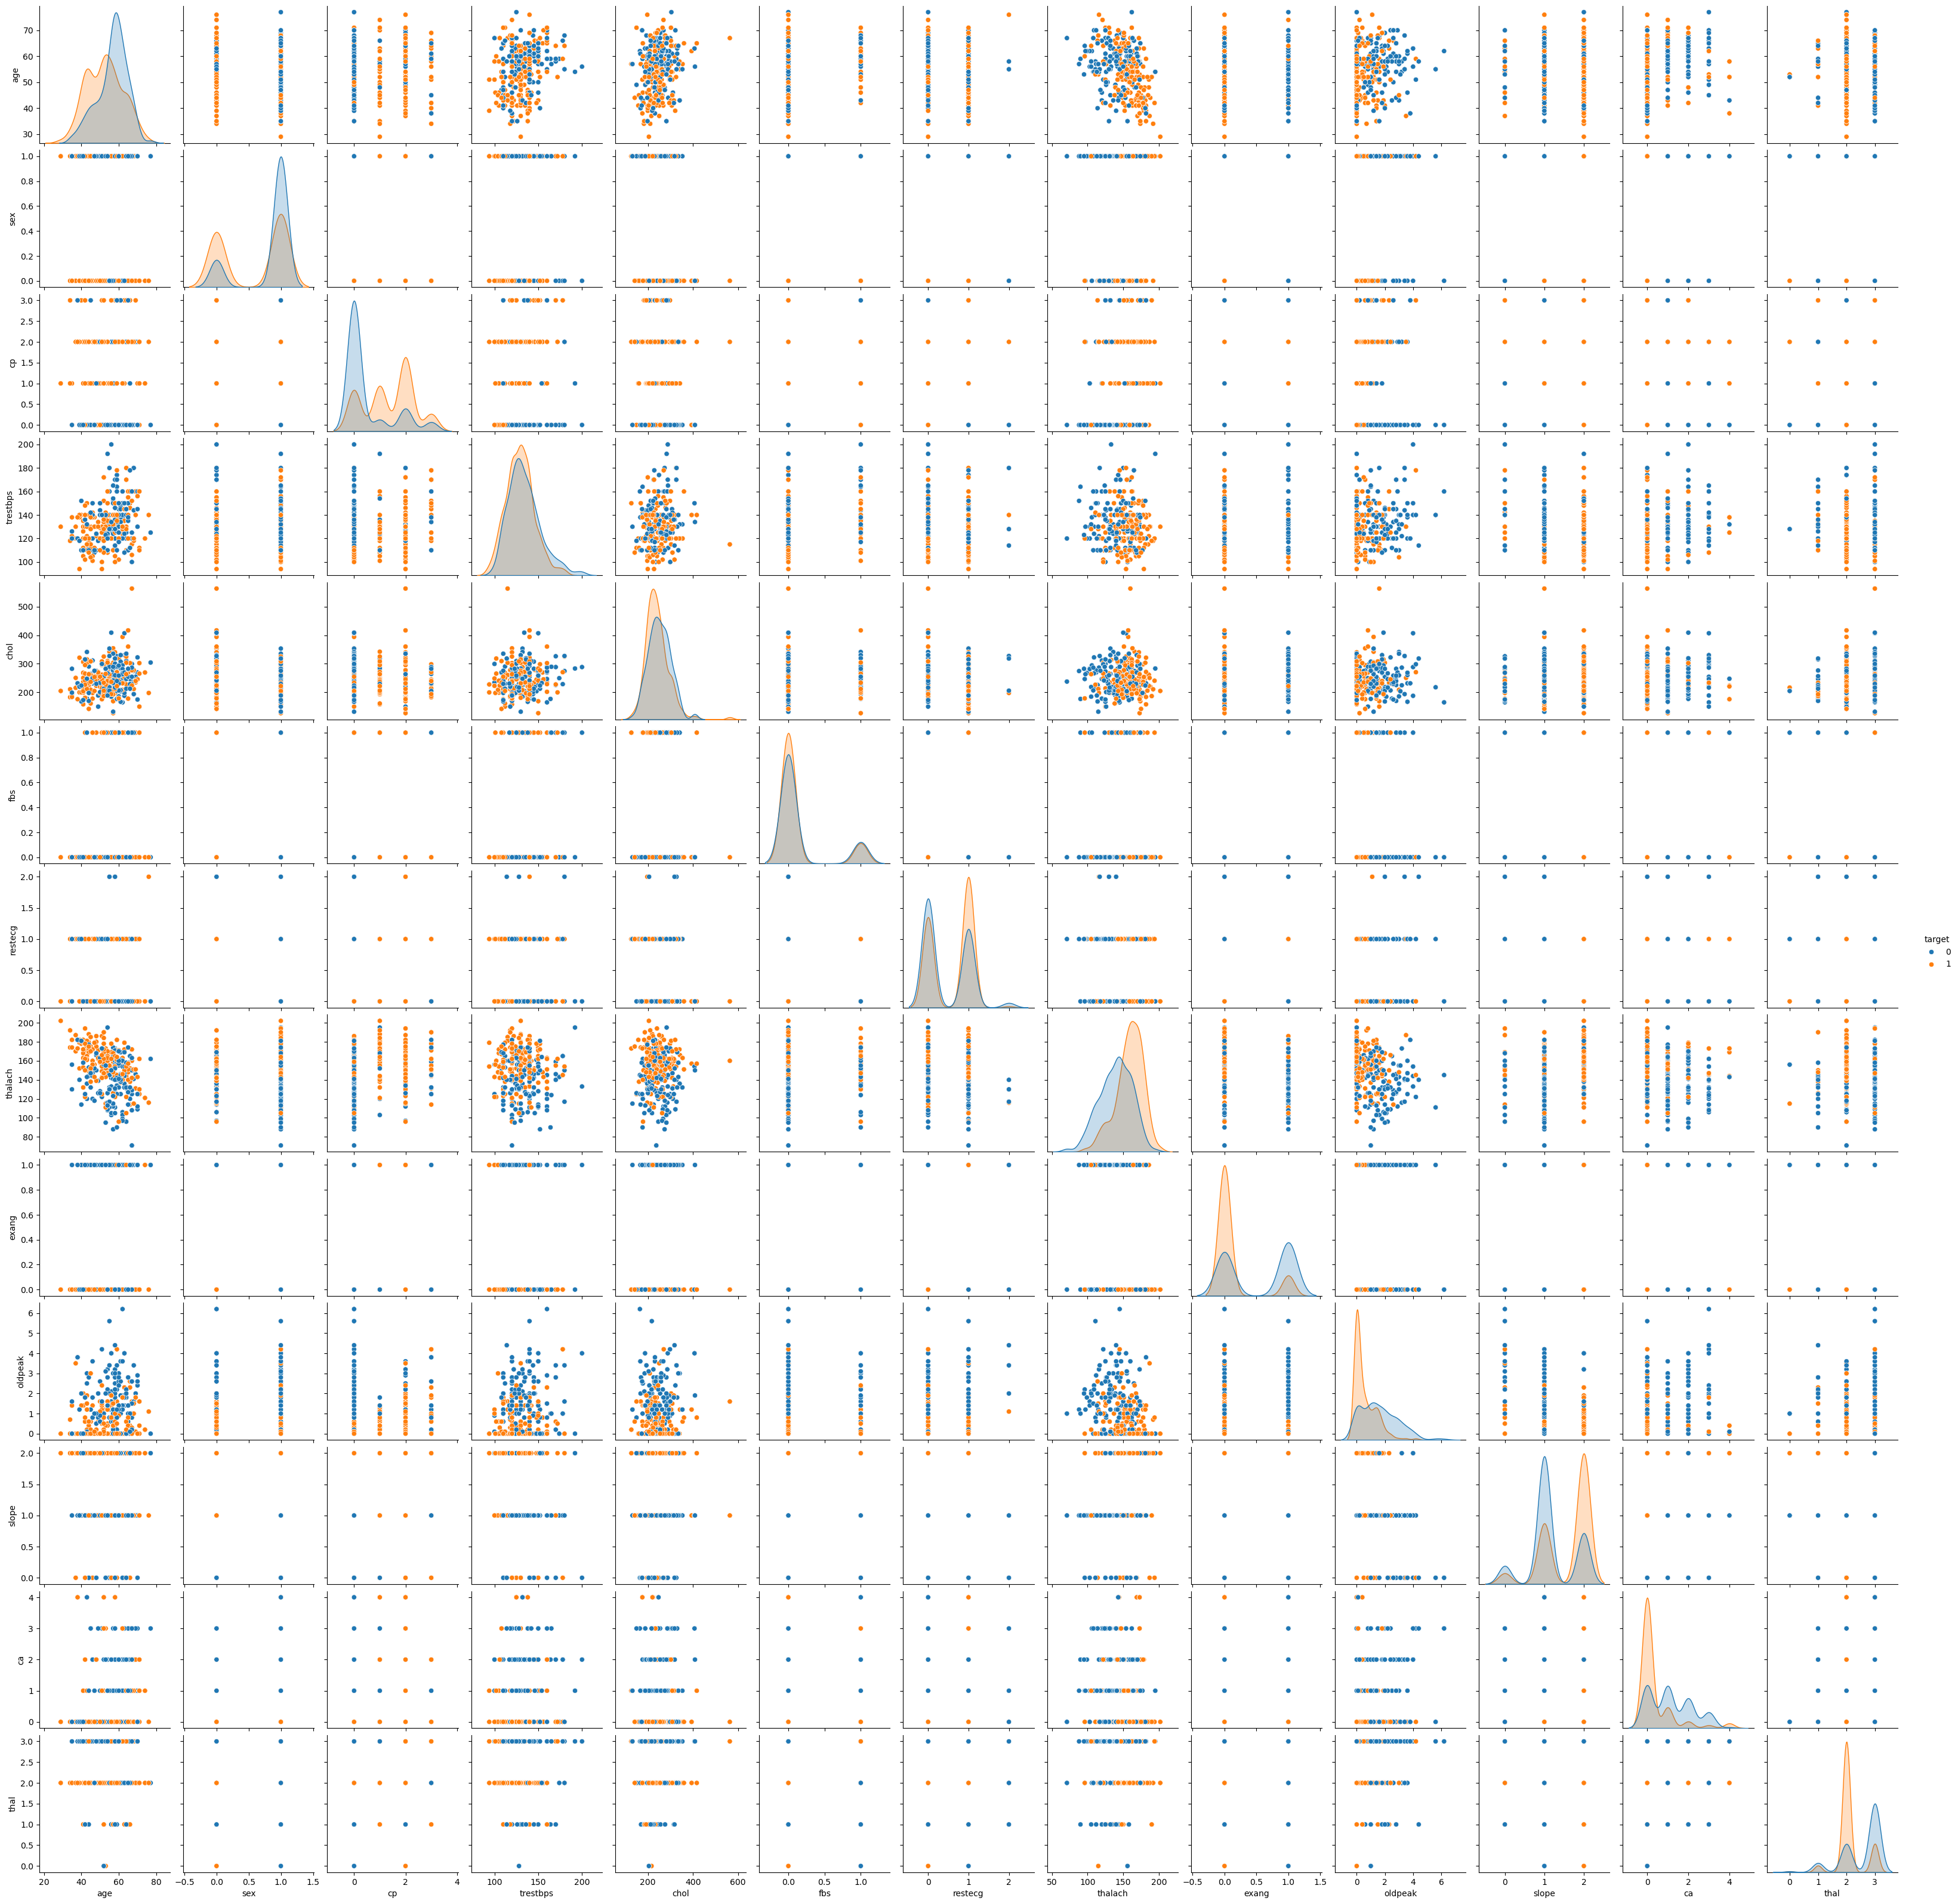

In [14]:
sns.pairplot(df, hue='target')
plt.show()

<Axes: >

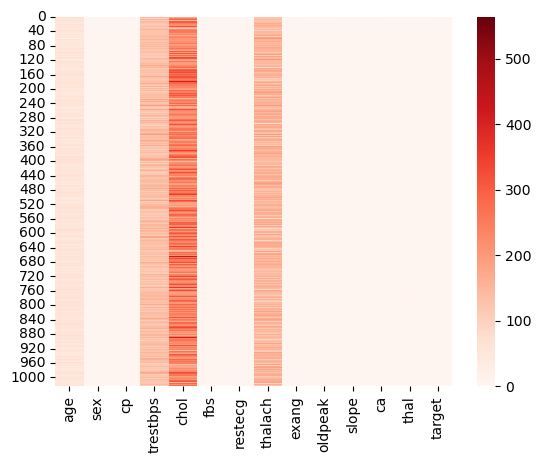

In [15]:
sns.heatmap(df,cmap='Reds')

C:\Users\user\Desktop\heart_project\env\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\user\Desktop\heart_project\env\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


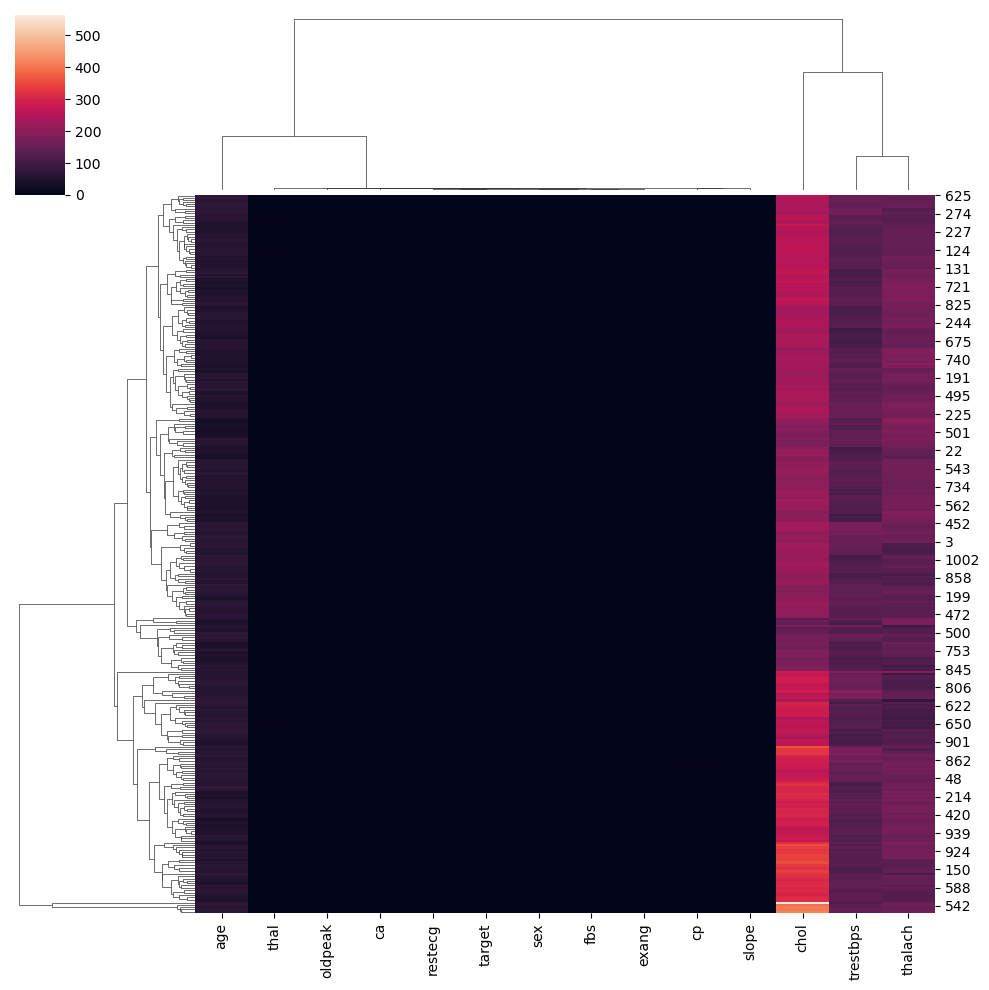

In [16]:
sns.clustermap(df)

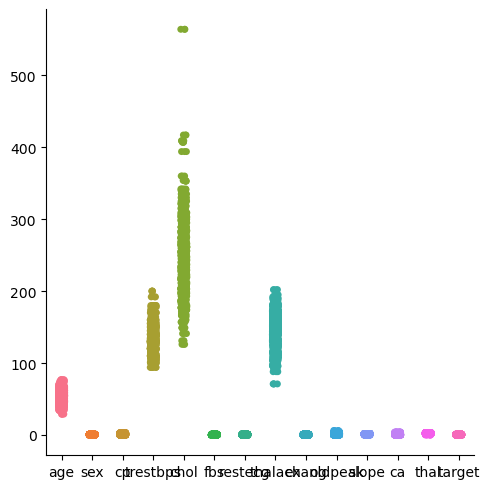

In [17]:
sns.catplot(df)

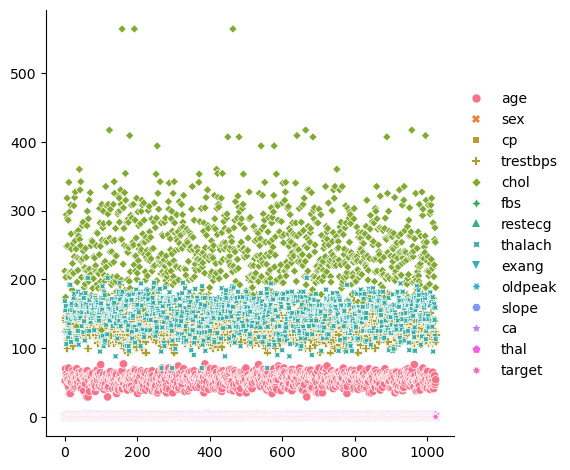

In [18]:
sns.relplot(df)

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

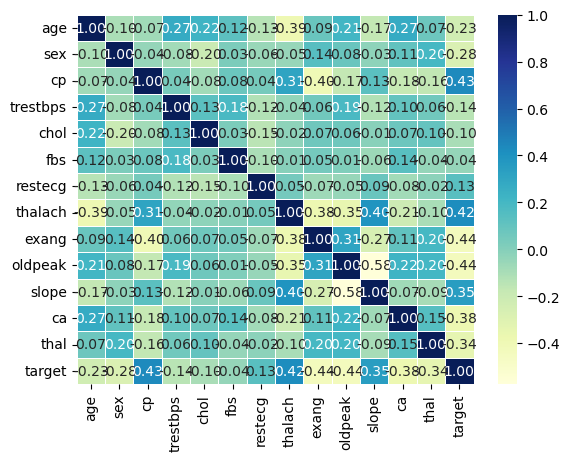

In [20]:
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='.2f',cmap='YlGnBu')

In [21]:
x = df.drop('target',axis = 1)
y = df['target']
pipe_standard = Pipeline([('imputer',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())])

In [22]:
pipe_standard.fit(x,y)

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [24]:
models = {'LogisticRegression':LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'RandomForestClassifier': RandomForestClassifier()}

In [25]:
def fit_score(x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score = {}
    for model_name in models:
        model_score[model_name] = accuracy_score(y_test,(models[model_name].fit(x_train,y_train)).predict(x_test))
    return model_score

C:\Users\user\Desktop\heart_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

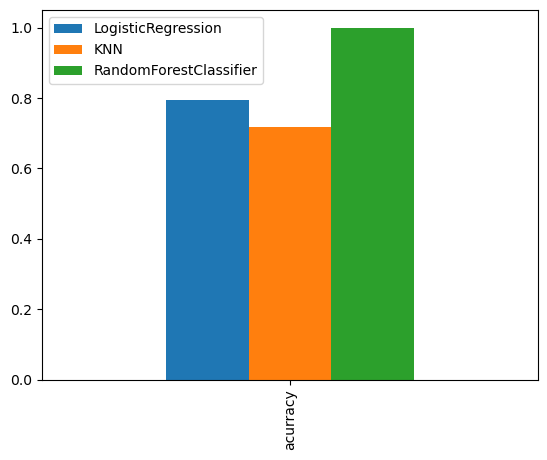

In [26]:
model_score = fit_score(x_train,x_test,y_train,y_test)
pd.DataFrame(model_score,index=['acurracy']).plot(kind='bar')

In [27]:
#tunning knn model
param_grid = {
    'n_neighbors': [3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1,2]
}
gridknn = GridSearchCV(estimator=KNeighborsClassifier(),
                       param_grid=param_grid,
                       n_jobs=-1,
                       cv=5,
                       scoring='accuracy')


In [28]:
models[1] = gridknn

In [29]:
param_gridrf= {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
gridrf = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid=param_gridrf,
                       n_jobs=-1,
                       cv=5,
                       scoring='accuracy')


In [30]:
models[2] = gridrf

In [31]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [500, 1000]
}
gridlr = GridSearchCV(estimator=LogisticRegression(),
                       param_grid=param_grid_lr,
                       n_jobs=-1,
                       cv=5,
                       scoring='accuracy')


In [32]:
models[0] = gridlr

In [33]:
'''
0=gridlr
1=gridknn
2 = gridrf
'''

'\n0=gridlr\n1=gridknn\n2 = gridrf\n'

C:\Users\user\Desktop\heart_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

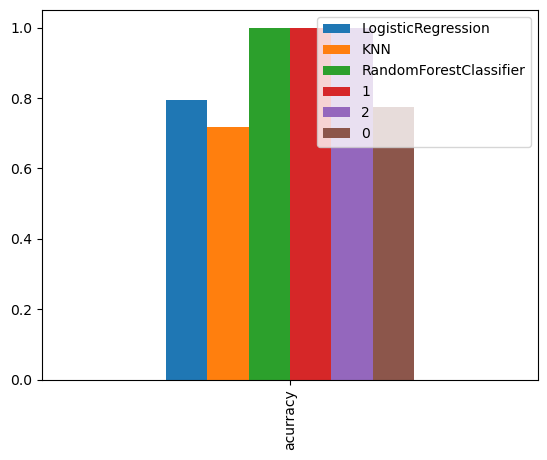

In [44]:
model_score = fit_score(x_train,x_test,y_train,y_test)
pd.DataFrame(model_score,index=['acurracy']).plot(kind='bar')

In [45]:
randomknn = RandomizedSearchCV(estimator=KNeighborsClassifier(),
                               param_distributions=param_grid,
                               cv = 5,
                               n_iter=20,
                               n_jobs=-1,
                               scoring='accuracy')

In [46]:
randomrf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                              param_distributions=param_gridrf,
                              cv = 5,
                              n_iter=20,
                              n_jobs = -1,
                              scoring='accuracy')

In [47]:
randomlr = RandomizedSearchCV(estimator=LogisticRegression(),
                              param_distributions=param_grid_lr,
                              cv = 5,
                              n_iter=20,
                              n_jobs = -1,
                              scoring='accuracy')

In [48]:
'''
0=randomlr
1=randomknn
2 = randomrf
'''

'\n0=randomlr\n1=randomknn\n2 = randomrf\n'

In [49]:
models[0] = randomlr
models[1] = randomknn
models[2] = randomrf

C:\Users\user\Desktop\heart_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

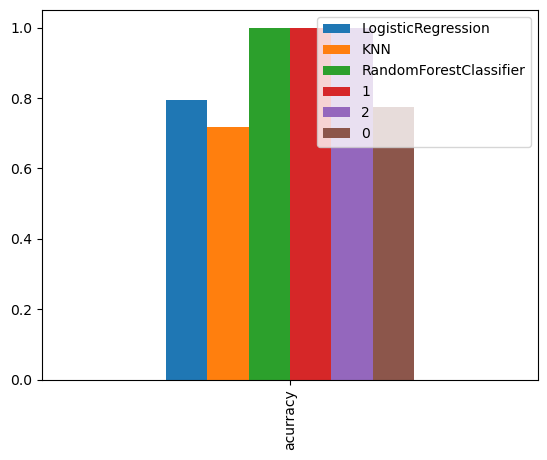

In [50]:
model_score = fit_score(x_train,x_test,y_train,y_test)
pd.DataFrame(model_score,index=['acurracy']).plot(kind='bar')

In [51]:
gridrf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       104

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



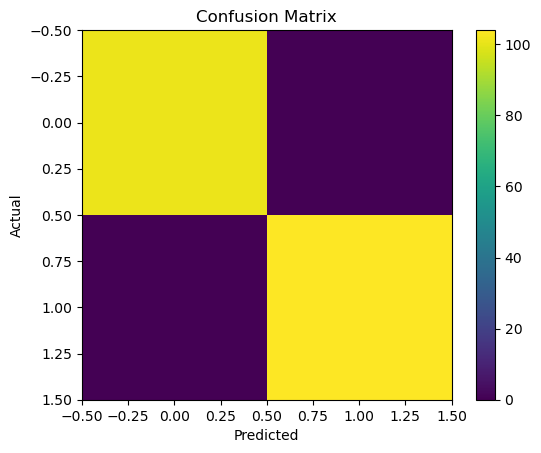

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
best_model = gridrf
y_pred = best_model.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


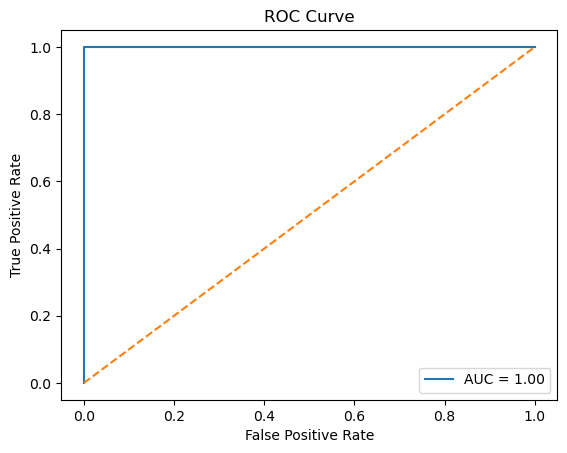

In [56]:
# ROC-AUC Curve
y_proba = best_model.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()